In [ ]:
#######################################################################
#    Yohannes Bulcho, Jonathan Fuentes, Dimeji Olayinka, Joshua Parks #
#    115282902                                                        #
#    2019-11-12                                                       #
#    INST326 Final Project                                            #
#######################################################################

# Data Cleaning

In [30]:
# Import various packages for data analysis

import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import statsmodels.formula.api as smf
import scipy as sp

In [31]:
# Read in data set as movie variable

movie = pd.read_csv("INST326Project.csv")

In [32]:
movie.columns = [c.replace('\n', '_') for c in movie.columns]
movie.columns = [c.replace('-', '_') for c in movie.columns]

In [33]:
movie.columns

Index(['Movie', 'Release_Date', 'Distributor', 'MPAA_Rating', 'Domestic Gross',
       'Inflation_Adjusted_Gross', 'Genre'],
      dtype='object')

In [34]:
movie2=movie[movie.Release_Date !="1927-03-06"]

In [35]:
movie2['Release_Date'] = pd.to_datetime(movie2['Release_Date'], dayfirst=True, errors ='coerce')

C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
from datetime import date

date_from = pd.Timestamp(date(2000,1,1))
date_to = pd.Timestamp(date(2009,12,31))

# df is defined in the previous example

d2000 = movie2[
    (movie2['Release_Date'] > date_from ) &
    (movie2['Release_Date'] < date_to)
]

# Convert genre from categorical variables to numerical.
# Not Rated = 0; G = 1, PG = 2; PG-13 = 3; R = 4; NC-17 & Open = 5
findL = ['Not Rated', 'G', 'PG', 'PG-13', 'R', 'NC-17', 'Open']
replaceL = [0,1,2,3,4,5,5]
d2000['MPAA_Rating'] = d2000['MPAA_Rating'].replace(findL, replaceL)

# Change types of 'Inflation-Adjusted_Gross' and 'Domestic Gross' to ints
d2000["Inflation_Adjusted_Gross"] = d2000["Inflation_Adjusted_Gross"].astype(int) 
d2000["Domestic Gross"] = d2000["Domestic Gross"].astype(int) 

print(d2000.dtypes)
d2000.head()

Movie                               object
Release_Date                datetime64[ns]
Distributor                         object
MPAA_Rating                          int64
Domestic Gross                       int32
Inflation_Adjusted_Gross             int32
Genre                               object
dtype: object


C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,Movie,Release_Date,Distributor,MPAA_Rating,Domestic Gross,Inflation_Adjusted_Gross,Genre
440,Next Friday,2000-01-12,New Line,4,57176582,83696331,Comedy
441,Isn't She Great,2000-01-28,Universal,4,2954405,4324722,Comedy
442,The Cup,2000-01-28,Fine Line,1,1067773,1563033,Comedy
443,The Big Tease,2000-01-28,Warner Bros.,4,185577,271653,Comedy
444,Gun Shy,2000-02-04,Walt Disney,4,1638202,2388721,Comedy


# Graphs 

C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


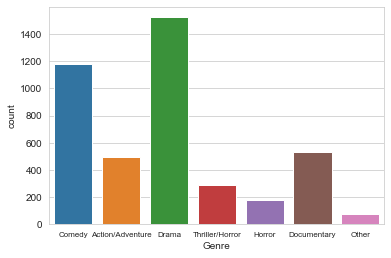

In [38]:
# Grouping genres by similar content to make data visualization cleaner.
findG = ['Action','Adventure','Black Comedy','Romantic Comedy','Musical','Multiple Genres','Western','Thriller/Suspense']
replaceG = ['Action/Adventure','Action/Adventure','Comedy','Comedy','Other','Other','Other','Thriller/Horror']
d2000['Genre'] = d2000['Genre'].replace(findG, replaceG)

# Bar chart of count of genres in dataset.
sns.set_style("whitegrid")
ax = sns.countplot(x='Genre', data=d2000)
ax.tick_params(axis="x", labelsize=8)


(0, 4)

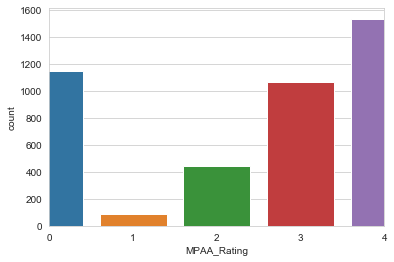

In [39]:
# Bar chart showing the count of the ratings for the movies 

sns.set_style("whitegrid")
a = sns.countplot(x='MPAA_Rating', data=d2000)
plt.xlim(0,4)

C:\Users\jpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


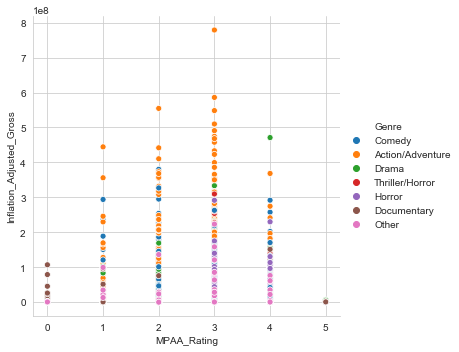

In [40]:
# Grouping genres by similar content to make data visualization cleaner.
findG = ['Action','Adventure','Black Comedy','Romantic Comedy','Musical','Multiple Genres','Western','Thriller/Suspense']
replaceG = ['Action/Adventure','Action/Adventure','Comedy','Comedy','Other','Other','Other','Thriller/Horror']
d2000['Genre'] = d2000['Genre'].replace(findG, replaceG)

# Graph comparing movie ratings and their respective gross earnings for the 2000's. 
sns.relplot(x="MPAA_Rating", y="Inflation_Adjusted_Gross", hue="Genre", data=d2000)



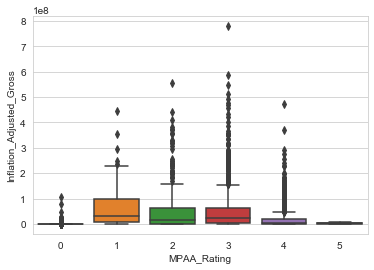

In [42]:
# This boxplot shows that there's a lot of spread amongst the rating, specifically PG-13 (3) rated movies. 

sns.boxplot(x='MPAA_Rating',y='Inflation_Adjusted_Gross', data=d2000)

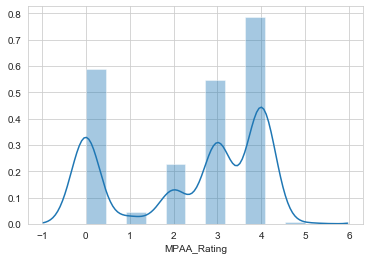

In [43]:
#Histogram showing that the rating is skewed left since rated R (4) movies are very present in the dataset. 
sns.distplot(d2000['MPAA_Rating'])

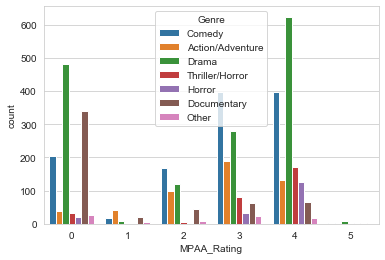

In [23]:
# Bar chart showing the count of ratings with genre as a filter

ax = sns.countplot(x='MPAA_Rating', hue='Genre', data=d2000)

# Descriptive Statistics

In [24]:
d2000.head()

,Movie,Release_Date,Distributor,MPAA_Rating,Domestic Gross,Inflation-Adjusted_Gross,Genre
440,Next Friday,2000-01-12,New Line,4,57176582,83696331,Comedy
441,Isn't She Great,2000-01-28,Universal,4,2954405,4324722,Comedy
442,The Cup,2000-01-28,Fine Line,1,1067773,1563033,Comedy
443,The Big Tease,2000-01-28,Warner Bros.,4,185577,271653,Comedy
444,Gun Shy,2000-02-04,Walt Disney,4,1638202,2388721,Comedy


In [25]:
d2000['MPAA_Rating'].describe()

count    4285.000000
mean        2.415869
std         1.619999
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: MPAA_Rating, dtype: float64

In [26]:
d2000['Inflation_Adjusted_Gross'].describe()

count    4.285000e+03
mean     2.635935e+07
std      5.897918e+07
min      0.000000e+00
25%      7.456800e+04
50%      1.265012e+06
75%      2.549441e+07
max      7.788176e+08
Name: Inflation-Adjusted_Gross, dtype: float64

In [27]:
d2000['Domestic Gross'].describe()

count    4.285000e+03
mean     2.132007e+07
std      4.820263e+07
min      0.000000e+00
25%      6.367200e+04
50%      1.032075e+06
75%      2.044063e+07
max      7.605076e+08
Name: Domestic Gross, dtype: float64

In [28]:

d2000['Distributor'].describe()

count              4149
unique              415
top       Sony Pictures
freq                241
Name: Distributor, dtype: object

In [29]:
d2000['Genre'].describe()

count      4285
unique        7
top       Drama
freq       1522
Name: Genre, dtype: object